# 数据可视化作业题目

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [134]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [135]:
grouped = data.groupby(['year'])
data_byyear = grouped[['passengers']].agg('sum')
data_byyear

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


In [137]:
data_bymonth = data.groupby(['month'], observed=False).agg({'passengers': 'sum'})
data_bymonth 

,passengers
month,
Jan,2901
Feb,2820
Mar,3242
Apr,3205
May,3262
Jun,3740
Jul,4216
Aug,4213
Sep,3629


In [138]:
sns.__version__

'0.13.0'

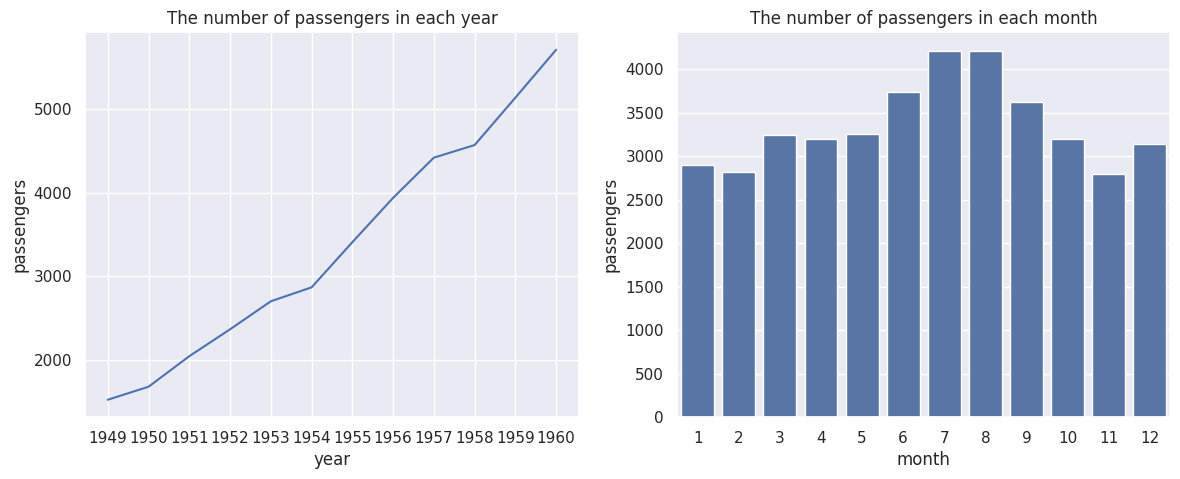

In [139]:
#Initialize a matplotlib subplot with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(14,5))

#Plot the yearly data
sns.lineplot(data = data_byyear['passengers'], ax = ax[0])
ax[0].set_title('The number of passengers in each year')
ax[0].set_xticks(data_byyear.index) # to show all year index

#plot the monthly data
sns.barplot(data = data_bymonth['passengers'], ax = ax[1])
ax[1].set_title('The number of passengers in each month')
ax[1].set_xticks(data_bymonth.index,range(1,13))

plt.show()

#### conclusion:
1. From 1949 to 1960 the number of pagssenger per year increased nearly linerly. 
2. In July and August the number of passgengers reaches its max.

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [34]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

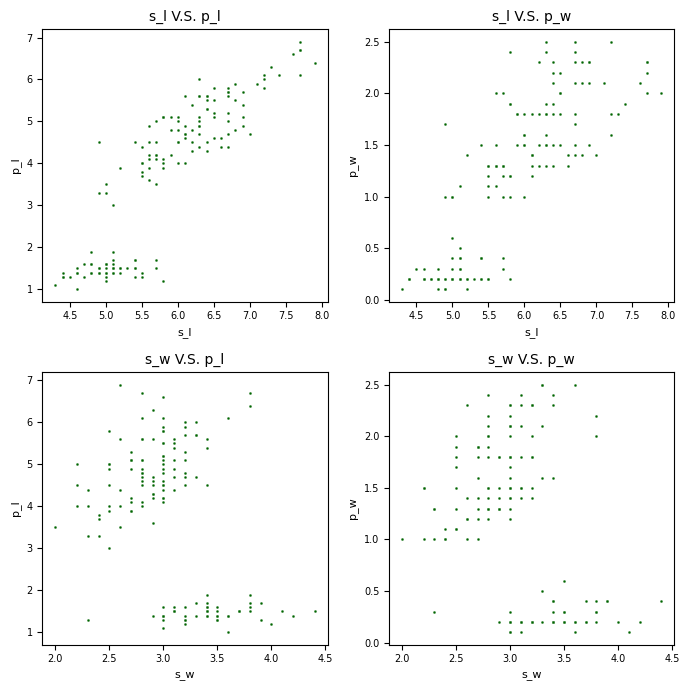

In [9]:
#Initialize a matplotlib subplot with 2 row and 2 columns
fig, ax = plt.subplots(2,2, figsize = (7, 7))

sns.scatterplot(data = data, x='sepal_length'  , y = 'petal_length', s = 4, ax = ax[0,0], c = 'darkgreen')
ax[0,0].set_title('s_l V.S. p_l', fontsize=10)
ax[0,0].set_xlabel('s_l', fontsize=8)
ax[0,0].set_ylabel('p_l', fontsize=8)
ax[0,0].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize

sns.scatterplot(data = data, x='sepal_length'  , y = 'petal_width', s = 4, ax = ax[0,1], c = 'darkgreen')
ax[0,1].set_title('s_l V.S. p_w', fontsize=10)
ax[0,1].set_xlabel('s_l', fontsize=8)
ax[0,1].set_ylabel('p_w', fontsize=8)
ax[0,1].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize
#ax[0,1].tick_params(axis='both', which='minor', labelsize=5)

sns.scatterplot(data = data, x='sepal_width'  , y = 'petal_length', s = 4, ax = ax[1,0], c = 'darkgreen')
ax[1,0].set_title('s_w V.S. p_l', fontsize=10)
ax[1,0].set_xlabel('s_w', fontsize=8)
ax[1,0].set_ylabel('p_l', fontsize=8)
ax[1,0].tick_params(axis='both', which='major', labelsize=7)

sns.scatterplot(data = data, x='sepal_width'  , y = 'petal_width', s = 4, ax = ax[1,1], c = 'darkgreen')
ax[1,1].set_title('s_w V.S. p_w', fontsize=10)
ax[1,1].set_xlabel('s_w', fontsize=8)
ax[1,1].set_ylabel('p_w', fontsize=8)
ax[1,1].tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout()# improve the layout
plt.show()

In [ ]:
# calculate Pearson Correlation coefficients
print('Pearson Correlation coefficient between sepal length & petal length:', np.corrcoef(data['sepal_length'].values, data['petal_length'].values)[0,1])
print('Pearson Correlation coefficient between sepal length & petal width:', np.corrcoef(data['sepal_length'].values, data['petal_width'].values)[0,1])
print('Pearson Correlation coefficient between sepal width & petal length:', np.corrcoef(data['sepal_width'].values, data['petal_length'].values)[0,1])
print('Pearson Correlation coefficient between sepal width & petal width:', np.corrcoef(data['sepal_width'].values, data['petal_width'].values)[0,1])

#### conclusion:
1. sepal length is strongly positively correlated with petal length and petal width.
2. sepal width is weakly negatively correlated with petal length and petal width.

2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

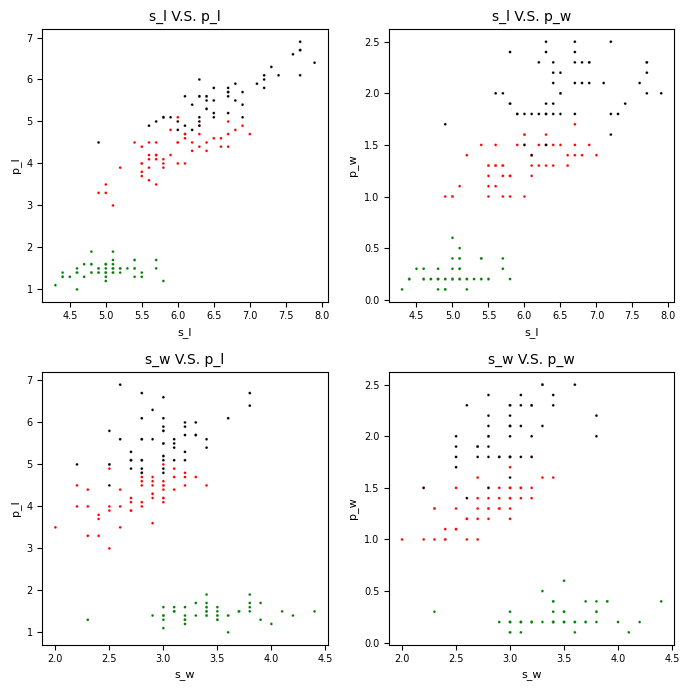

In [10]:
#Initialize a matplotlib subplot with 2 row and 2 columns
fig, ax = plt.subplots(2,2, figsize = (7,7))
color_map = {'setosa': 'green', 'versicolor': 'red', 'virginica': 'black'}

sns.scatterplot(data = data, x='sepal_length'  , y = 'petal_length', s = 4, ax = ax[0,0], c = data['species'].map(color_map))
ax[0,0].set_title('s_l V.S. p_l', fontsize=10)
ax[0,0].set_xlabel('s_l', fontsize=8)
ax[0,0].set_ylabel('p_l', fontsize=8)
ax[0,0].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize

sns.scatterplot(data = data, x='sepal_length'  , y = 'petal_width', s = 4, ax = ax[0,1], c = data['species'].map(color_map))
ax[0,1].set_title('s_l V.S. p_w', fontsize=10)
ax[0,1].set_xlabel('s_l', fontsize=8)
ax[0,1].set_ylabel('p_w', fontsize=8)
ax[0,1].tick_params(axis='both', which='major', labelsize=7)# set tick fontsize
#ax[0,1].tick_params(axis='both', which='minor', labelsize=5)

sns.scatterplot(data = data, x='sepal_width'  , y = 'petal_length', s = 4, ax = ax[1,0], c = data['species'].map(color_map))
ax[1,0].set_title('s_w V.S. p_l', fontsize=10)
ax[1,0].set_xlabel('s_w', fontsize=8)
ax[1,0].set_ylabel('p_l', fontsize=8)
ax[1,0].tick_params(axis='both', which='major', labelsize=7)

sns.scatterplot(data = data, x='sepal_width'  , y = 'petal_width', s = 4, ax = ax[1,1], c = data['species'].map(color_map))
ax[1,1].set_title('s_w V.S. p_w', fontsize=10)
ax[1,1].set_xlabel('s_w', fontsize=8)
ax[1,1].set_ylabel('p_w', fontsize=8)
ax[1,1].tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout()# improve the layout
plt.show()

3 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

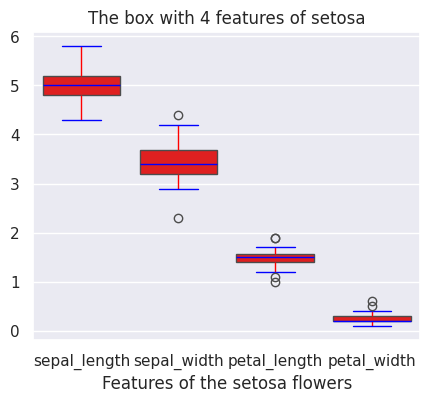

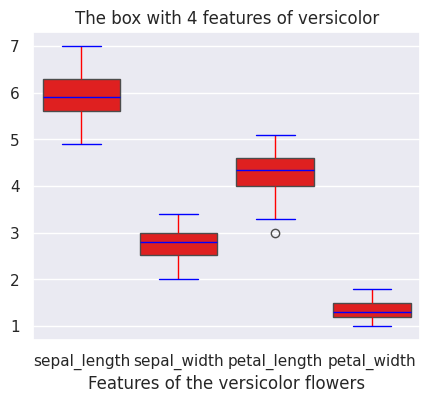

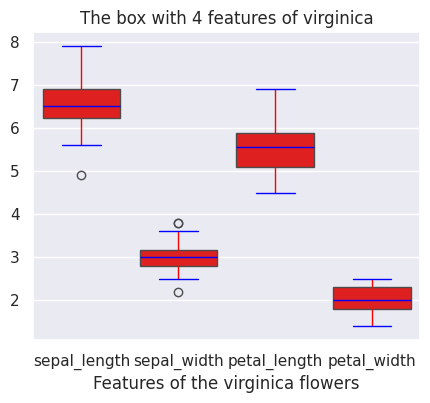

In [35]:
sns.set()# show gray background and white grid
species_list = data['species'].unique()

for species in species_list:
    selected_data = data.loc[data['species'] == species]
    plt.subplots(figsize=(5, 4)) # set figure size
    sns.boxplot(data = selected_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],
            patch_artist = True, # boxes are drawn with Patch artists.
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

    plt.title(f'The box with 4 features of {species}')
    plt.xlabel(f'Features of the {species} flowers')
    plt.show() # otherwise all plots are in one frame

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [36]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. 小费和总消费之间的关系（提示：散点图+回归分析）

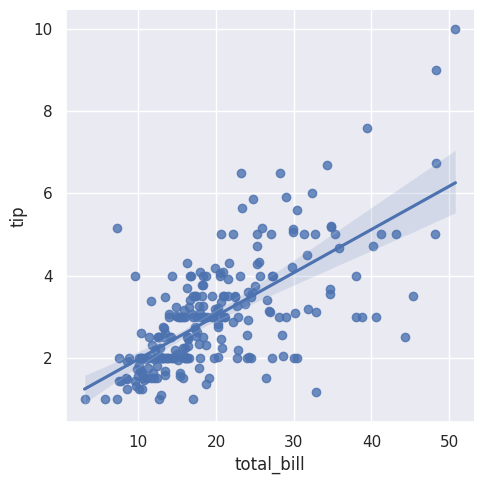

In [37]:
sns.lmplot(x = 'total_bill' , y = 'tip', data = data)
plt.show()

2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

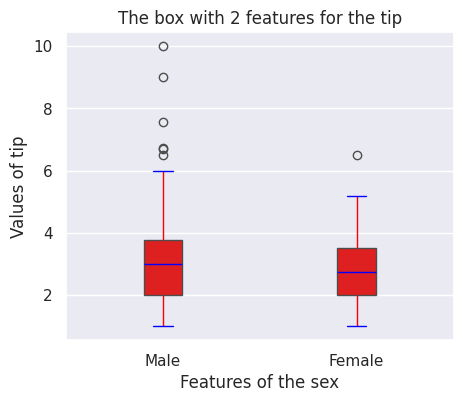

In [52]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'sex', y = 'tip', data =  data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the sex')
plt.ylabel('Values of tip')
plt.show()

3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

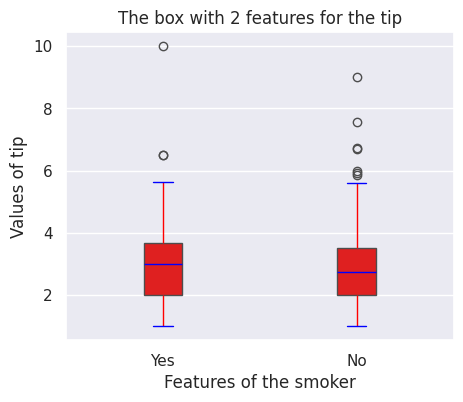

In [53]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'smoker', y = 'tip', data =  data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the smoker')
plt.ylabel('Values of tip')
plt.show()

4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

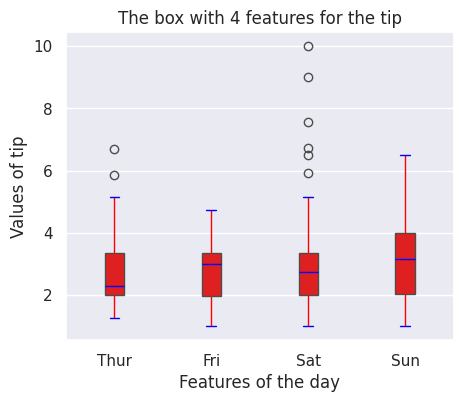

In [54]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'day', y = 'tip', data =  data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the day')
plt.ylabel('Values of tip')
plt.show()

5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

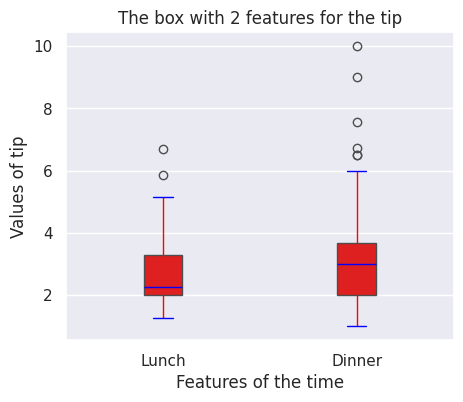

In [56]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'time', y = 'tip', data =  data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the time')
plt.ylabel('Values of tip')
plt.show()

6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

In [58]:
data['size'].unique()

array([2, 3, 4, 1, 6, 5])

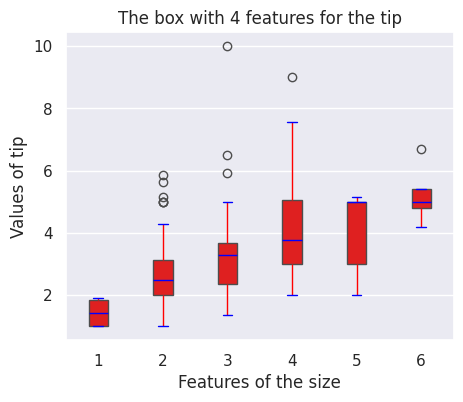

In [59]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'size', y = 'tip', data =  data, width = 0.3,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 4 features for the tip')
plt.xlabel('Features of the size')
plt.ylabel('Values of tip')
plt.show()

7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


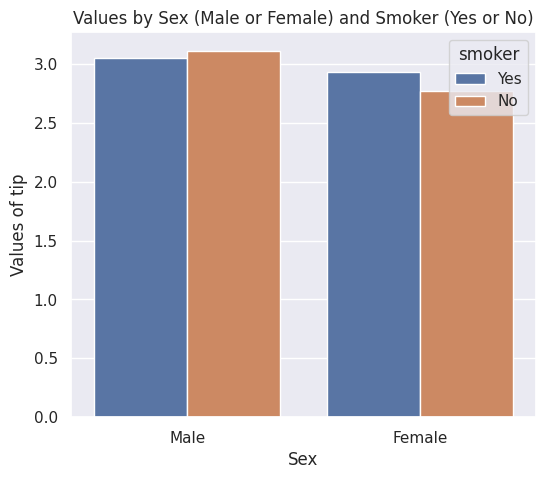

In [68]:
sex_smoker = data.groupby(['sex', 'smoker'], observed = False)['tip'].mean().unstack()
print(sex_smoker)
fig = plt.figure(figsize = (6, 5))
sns.barplot(x = 'sex', y = 'tip', hue = 'smoker', data = data, errorbar = None)
plt.title('Values by Sex (Male or Female) and Smoker (Yes or No)')
plt.xlabel('Sex')
plt.ylabel('Values of tip')
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [69]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

In [71]:
data['unsurvived'] = 1-data.survived #add a new column
survived_unsurvived = data.groupby('pclass')[['survived','unsurvived']].sum()
survived_unsurvived['total'] = survived_unsurvived['survived'] + survived_unsurvived['unsurvived']
survived_unsurvived['survived_prop'] =  survived_unsurvived['survived']/survived_unsurvived['total']
survived_unsurvived['unsurvived_prop'] =  survived_unsurvived['unsurvived']/survived_unsurvived['total']
survived_unsurvived

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


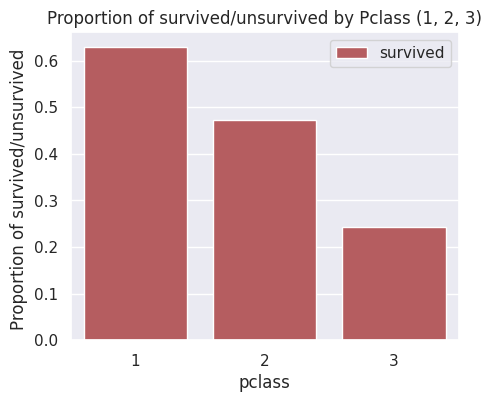

In [95]:
fig = plt.figure(figsize = (5, 4))
sns.barplot(x = 'pclass', y = 'survived_prop', data = survived_unsurvived, label = 'survived', color = 'r')
#sns.barplot(x = 'pclass', y = 'unsurvived_prop' , data = survived_unsurvived, label = 'unsurvived', color = 'b', bottom = True)
plt.title('Proportion of survived/unsurvived by Pclass (1, 2, 3)')
plt.ylabel('Proportion of survived/unsurvived ')
plt.legend(loc = 'best')# show the labels
plt.show()    

2. 不同性别的幸存比例（提示：箱图或者提琴图）

In [97]:
survived_unsurvived_sex = data.groupby('sex')[['survived','unsurvived']].sum()
survived_unsurvived_sex['total'] = survived_unsurvived_sex['survived'] + survived_unsurvived_sex['unsurvived']
survived_unsurvived_sex['survived_prop'] =  survived_unsurvived_sex['survived']/survived_unsurvived_sex['total']
survived_unsurvived_sex['unsurvived_prop'] =  survived_unsurvived_sex['unsurvived']/survived_unsurvived_sex['total']
survived_unsurvived_sex

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


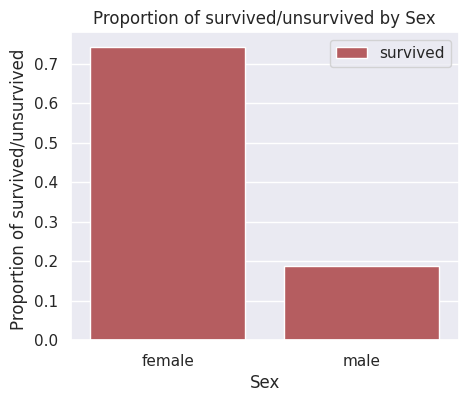

In [99]:
ig = plt.figure(figsize = (5, 4))
sns.barplot(x = 'sex', y = 'survived_prop', data = survived_unsurvived_sex, label = 'survived', color = 'r')
plt.title('Proportion of survived/unsurvived by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of survived/unsurvived ')
plt.legend(loc = 'best')# show the labels
plt.show()  

3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

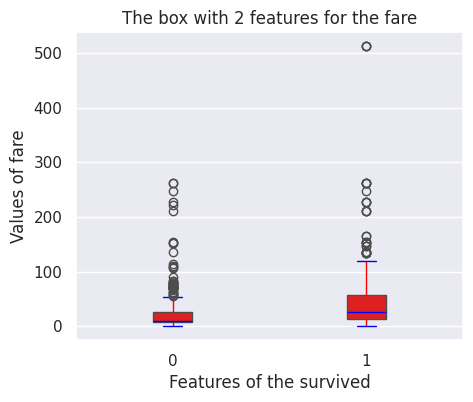

In [101]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'survived', y = 'fare', data =  data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the fare')
plt.xlabel('Features of the survived')
plt.ylabel('Values of fare')
plt.show()

4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

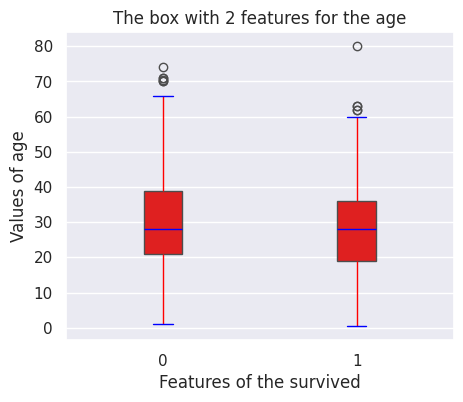

In [102]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'survived', y = 'age', data =  data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the age')
plt.xlabel('Features of the survived')
plt.ylabel('Values of age')
plt.show()

5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

In [105]:
embarked_plcass = data.groupby(['pclass', 'embarked']).size().unstack()
embarked_plcass

embarked,C,Q,S
pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [121]:
embarked_plcass_n = embarked_plcass.stack().reset_index(name='number')
print(embarked_plcass_n)

   pclass embarked  number
0       1        C      85
1       1        Q       2
2       1        S     127
3       2        C      17
4       2        Q       3
5       2        S     164
6       3        C      66
7       3        Q      72
8       3        S     353


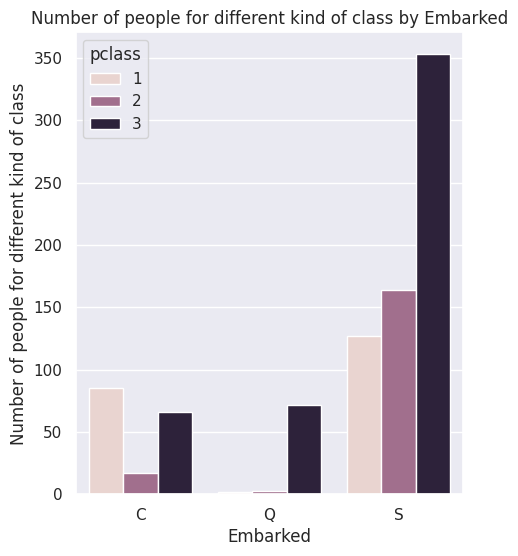

In [123]:
fig = plt.figure(figsize = (5, 6))
sns.barplot(x = 'embarked', y = 'number', data = embarked_plcass_n, hue = 'pclass')
plt.title('Number of people for different kind of class by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of people for different kind of class')
plt.show()

6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

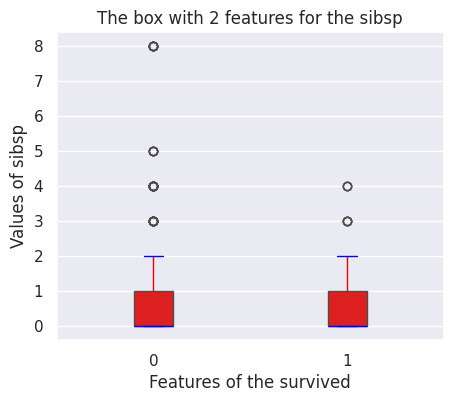

In [127]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'survived', y = 'sibsp',data = data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the sibsp')
plt.xlabel('Features of the survived')
plt.ylabel('Values of sibsp')
plt.show()

7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

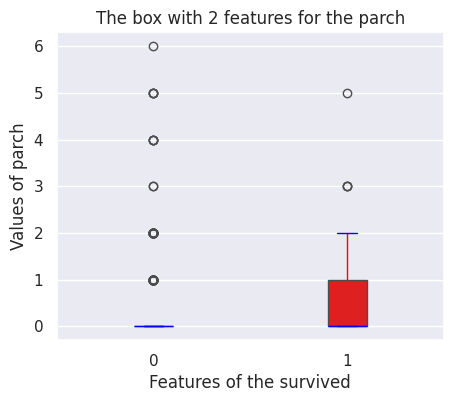

In [128]:
fig = plt.figure(figsize = (5, 4))
sns.boxplot( x = 'survived', y = 'parch',data = data, width = 0.2,
            capprops = dict(color = 'blue'),
            whiskerprops = dict(color = 'red'),
            medianprops = dict(color = 'blue'),
            color = 'red',
           )

plt.title('The box with 2 features for the parch')
plt.xlabel('Features of the survived')
plt.ylabel('Values of parch')
plt.show()

8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [130]:
alone_survived = data.groupby(['alone', 'survived'], observed = False).size().reset_index(name='number')
print(alone_survived)

   alone  survived  number
0  False         0     175
1  False         1     179
2   True         0     374
3   True         1     163


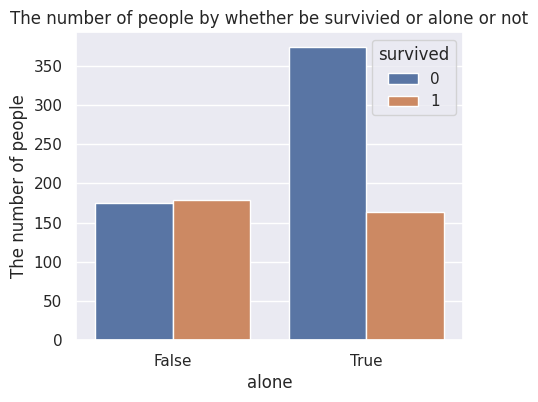

In [132]:
fig = plt.figure(figsize = (5, 4))
sns.barplot(x = 'alone', y = 'number', hue = 'survived', data = alone_survived, errorbar = None)
plt.title('The number of people by whether be survivied or alone or not')
plt.xlabel('alone')
plt.ylabel('The number of people')
plt.show()